
Importing Libraries
---



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

Load Datasets

In [71]:
train_data = pd.read_csv('/content/train_data.txt',sep = ':::',names = ['Title','Genre','Description'],engine='python')

have a look into data

In [72]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [73]:
test_data = pd.read_csv('/content/test_data.txt',sep = ':::',names =['ID','Title','Description'],engine ='python')

Have a look into data

In [74]:
test_data.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


now some description and info

In [75]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


EDA

<ipython-input-77-dc0c6b0e314f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data,y='Genre',order =train_data['Genre'].value_counts().index,palette ='viridis')


Text(0, 0.5, 'Genre')

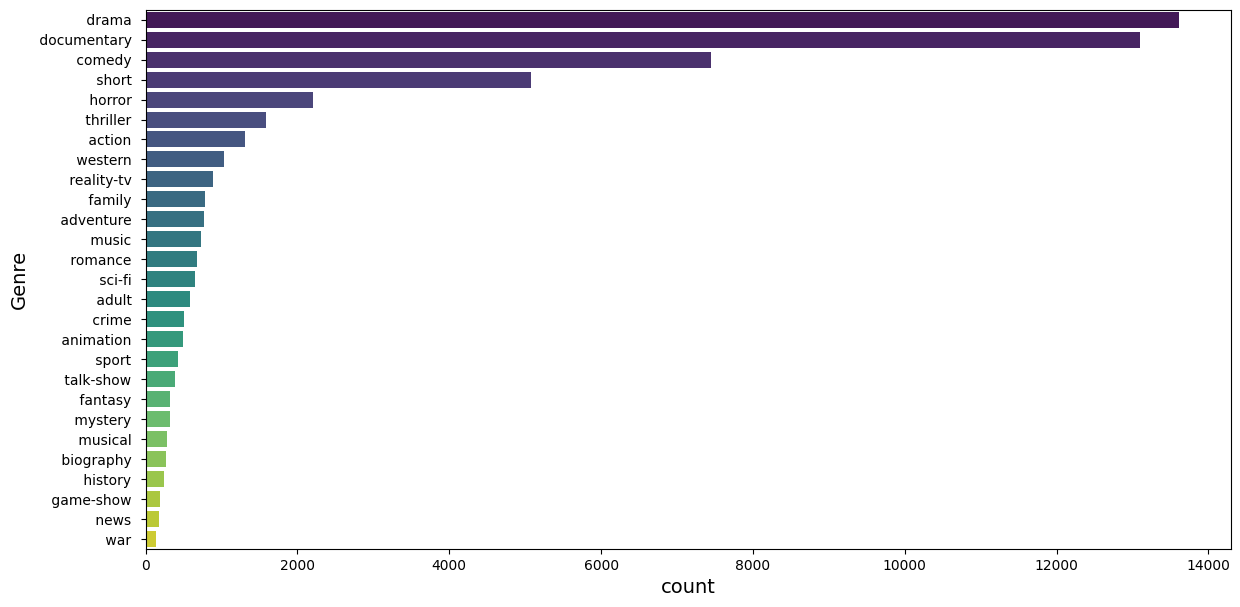

In [77]:
plt.figure(figsize=(14,7))

sns.countplot(data=train_data,y='Genre',order =train_data['Genre'].value_counts().index,palette ='viridis')
plt.xlabel('count',fontsize = 14)
plt.ylabel('Genre',fontsize = 14)


Data Preprocessing and text cleaning

Initializing stemmer and stop word

In [78]:
!pip install nltk

In [79]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


1.   using stemmer for converting big words to their base form like going = go
2.   using stopwords to remove unwanted words like the ,is, are, a



In [81]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text


cleaning text

In [82]:
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [83]:
train_data['Text_cleaning']

1        listening conversation doctor parents year old...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers recovered bodies ground zer...
                               ...                        
54210    short lived nbc live sitcom centered bonino wo...
54211    next generation exploitation sisters kapa bay ...
54212    bestaan echt stand comedy growing facing fears...
54213    walter vivian live country difficult time keep...
54214    labor day weekend intense hurricane ever make ...
Name: Text_cleaning, Length: 54214, dtype: object

Text Vectorization

In [85]:
tfidf_vectorizer = TfidfVectorizer()
x_train  = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
x_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

Splitting data

In [86]:
x = x_train
y = train_data['Genre']
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2,random_state = 10)



Naive Bayes Multinomial model intialization

In [87]:
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

predictions

In [88]:
y_pred = classifier.predict(x_val)

checking accuracy

In [89]:
accuracy = accuracy_score(y_val,y_pred)
print('Validation accuracy: ',accuracy)
print(classification_report(y_val,y_pred))

Validation accuracy:  0.4488610163238956
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       242
       adult        0.00      0.00      0.00       122
   adventure        0.00      0.00      0.00       148
   animation        0.00      0.00      0.00       101
   biography        0.00      0.00      0.00        53
      comedy        0.69      0.04      0.08      1501
       crime        0.00      0.00      0.00        89
 documentary        0.54      0.89      0.68      2664
       drama        0.38      0.88      0.53      2739
      family        0.00      0.00      0.00       159
     fantasy        0.00      0.00      0.00        64
   game-show        0.00      0.00      0.00        27
     history        0.00      0.00      0.00        48
      horror        0.00      0.00      0.00       421
       music        0.00      0.00      0.00       157
     musical        0.00      0.00      0.00        51
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(x_test)
test_data['Predicted_Genre'] = X_test_predictions

In [92]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          ID                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

In [93]:
results = pd.read_csv('/content/predicted_genres.csv')

In [94]:
results

,ID,Title,Description,Text_cleaning,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...,drama
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...,drama


With Logistic Regression model

building logistic regression model

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
LR_model = LogisticRegression()

fitting data into model

In [97]:
LR_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

prediction and accuracy

In [99]:
LR_y_pred = LR_model.predict(x_val)
LR_model_accuracy = accuracy_score(y_val,LR_y_pred)
print('accuracy score LR model: ',LR_model_accuracy)
print('classification report : ',classification_report(y_val,LR_y_pred))

accuracy score LR model:  0.5878446924282947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report :                 precision    recall  f1-score   support

      action        0.50      0.24      0.32       242
       adult        0.73      0.20      0.31       122
   adventure        0.66      0.13      0.21       148
   animation        0.67      0.02      0.04       101
   biography        0.00      0.00      0.00        53
      comedy        0.54      0.59      0.56      1501
       crime        0.00      0.00      0.00        89
 documentary        0.67      0.88      0.76      2664
       drama        0.53      0.81      0.64      2739
      family        0.57      0.05      0.09       159
     fantasy        0.00      0.00      0.00        64
   game-show        1.00      0.48      0.65        27
     history        0.00      0.00      0.00        48
      horror        0.67      0.55      0.60       421
       music        0.74      0.34      0.47       157
     musical        0.00      0.00      0.00        51
     mystery        0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


now with support vector machine

In [101]:
from sklearn.svm import SVC

In [102]:
svc_model = SVC()

In [ ]:
svc_model.fit(x_train,y_train)

In [ ]:
svc_pred = svc_model.predict(x_val)
svc_accuracy = accuracy_score(y_val,svc_pred)
print('svc model accuracy :',svc_accuracy)
print('classification_report: ',classification_report(y_val,svc_pred))